In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [3]:
df = pd.read_csv('housing.csv')

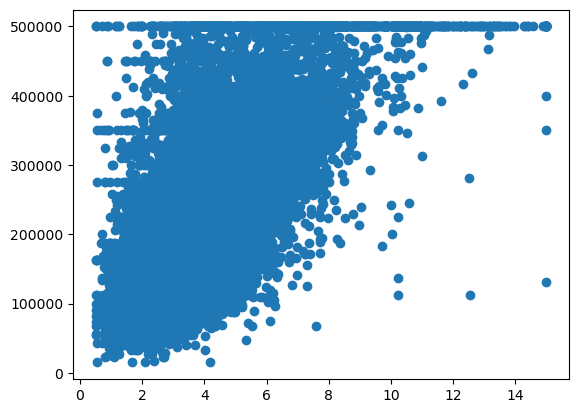

In [4]:
# Grafica income vs precio caa
plt.scatter(df['median_income'], df['median_house_value'])

In [5]:
# Elimina los máximos de precio casa
df = df[df.median_house_value != df.median_house_value.max()]

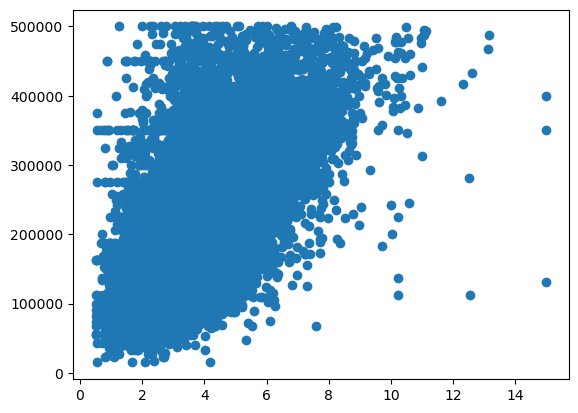

In [6]:
# Grafica sin los máximos
plt.scatter(df['median_income'], df['median_house_value'])

## Problema inicial: Quiero venderle casas a millonario, pero solo tengo datos de gente clase media, ¿cómo puedo estimar el valor de casas de millonarios?

Pista: es un tanto lógico, que a mayor ingreso mensual mayor precio de la casa. La casa de una familia con ingreso mensual de 6000 dolares en promedio vale menos que la de una de 10,000

In [7]:
# Crea una regreson lineal
model = linear_model.LinearRegression()
X = df[['median_income']]
y = df['median_house_value']

model.fit(X, y)

LinearRegression()

In [10]:
model.intercept_, model.coef_[0]

(45456.9967823177, 39987.01206231503)

Intercepto : valor mínimo que va a valer una casa


Coeficiente: Por cada 1,000 dolares más que gana una familia al mes, cuanto tiende a crecer el valor de su casa

$$Precio = \beta_0 + \beta_1 X $$

Mágicamente sklearn nos da esos numeros adaptados al problema, posteriormente ustedes verán como encontrar esos numeros 

$$Precio  = 45456 + 39987*ingreso$$

Llega un cliente millonario con ingreso mensual de 20,000 dolares y quiere vender su casa. 

¿Cuál es el precio?

### ¿qué significan estos coeficientes?

$\beta_0$ =  45456

$\beta_1$ =  39987

Cuando $\beta_1$ es 0 (es decir, el hogar no tiene ingresos) no tendría sentido decir que la casa no vale nada, las casas de la gente sin ingresos valen, por lo que la aproximación del modelo cuando la familia no tiene ingresos es de 45,456

Para el caso de $\beta_1$ nos da que es 39987, viendo la ecuación tiene que ver con que por cada mil dolares que la familia tenga extra de ingreso mensual, el precio de la casa debe aumentar 39987


In [13]:
# ejemplo, familia de 4 mil dolares


In [14]:
# Familia de 5 mil dolares


In [15]:
## diferencia


In [17]:
## La diferencia es exactamente igual a la estimación beta del model 


## ¿Qué tan bueno es el modelo?

1- Recordando que el modelo es simplemente --> 𝑃𝑟𝑒𝑐𝑖𝑜=45456+39987∗𝑖𝑛𝑔𝑟𝑒𝑠𝑜

In [18]:
# Aplicando el modelo


In [19]:
# Scikit learn ya nos ahorra esto, nos da lo mismo
# Utilizaremos la función predict 


### Visualizando el modelo 

In [20]:
# Visualiza las predicciones del modelo 


Observamos que ya podemos tener un modelo para familias que ganan mucho dinero al mes (arriba de 13 mil dolares por ejemplo)

¿Cuanto vale el precio de una casa de una familia millonaria que gana 15 mil dolares al mes?

### Midiendo el modelo 

#### Error cuadrático medio 


¿Cuál es la diferencia entre las predicciones?

Ahhh pues saco el error promedio de esas diferencias

Sale un numero muy cerano a 0, ¿quiere decir que el modelo es buenisimo?

No realmente, lo que pasa es que hay negativos y positivos. Es mejor sacar las diferencias al cuadrado para eliminar esos sesgos

Listo, ya tenemos una medida ... pero no es tan interpretable porque viene de un cuadrado

Obtenemos la raíz cuadrada

También podemos usar el paquete

### R2 score 

Varianza de las casa = Varianza(precio de casas - promedio precios), representa la variabilidad total en los datos.

Varianza de las predicciones = Varianza(precio de casas - predicción), representa la variabilidad no explicada por el modelo

Uno pensaría, que si el modelo es bueno la varianza de las predicciones será mucho menor a la varianza de la casa (un modelo personalizado debe vencer a simplemente dar un promedio).


$$r^2 = \frac{\text{Var}(y) - \text{Var}(y - \text{predicciones})}{\text{Var}(y)}$$


Utiliza sklearn para obtener el r2

Conceptualmente: el modelo es un 42% mejor que simplemente dar el precio promedio de las casas como estimación 